<a href="https://colab.research.google.com/github/sussahoo/Keras-ML/blob/master/TimeSeries_1Neuron_LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%204%20-%20S%2BP/S%2BP%20Week%202%20Lesson%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [0]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())
  break
print(dataset)

x =  [[36.417343   45.094387   44.97436    39.817963   42.99061    41.351192
  55.690018   51.631855   53.336246   50.61204    41.383835   44.43211
  49.527397   40.9959     50.697735   45.95752    45.31164    50.76733
  49.460827   45.46184   ]
 [82.2952     86.72619    81.8725     82.437515   78.29621    80.53653
  78.2063     79.88629    89.8238     79.58758    97.26462    86.32665
  84.53093    79.05104    86.569954   79.90539    83.09849    94.98353
  81.38736    87.288605  ]
 [22.487074   18.91756    13.98788    18.565226   15.846029   19.565367
  10.573323   11.806878   10.846607    4.8520856  13.013545   12.202472
  10.28818     8.456475    1.9209299   6.2647085   6.02649     3.1029897
   5.6846423   7.8905945 ]
 [60.83839    47.617447   55.74531    58.221962   53.5481     57.82629
  49.2742     58.26888    62.078083   48.130997   47.079636   55.936584
  55.930805   44.782898   44.661682   44.720486   38.77553    40.274677
  39.219364   39.77539   ]
 [24.14989    29.917734   31

In [0]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
model.fit(dataset,epochs=100,verbose=2)

print("Layer weights {}".format(l0.get_weights()))


<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float32, tf.float32)>
Epoch 1/100
31/31 - 0s - loss: 694.1855
Epoch 2/100
31/31 - 0s - loss: 148.6935
Epoch 3/100
31/31 - 0s - loss: 116.0513
Epoch 4/100
31/31 - 0s - loss: 109.3053
Epoch 5/100
31/31 - 0s - loss: 103.7762
Epoch 6/100
31/31 - 0s - loss: 98.9920
Epoch 7/100
31/31 - 0s - loss: 95.6160
Epoch 8/100
31/31 - 0s - loss: 92.8777
Epoch 9/100
31/31 - 0s - loss: 89.4710
Epoch 10/100
31/31 - 0s - loss: 86.8882
Epoch 11/100
31/31 - 0s - loss: 84.1187
Epoch 12/100
31/31 - 0s - loss: 82.5244
Epoch 13/100
31/31 - 0s - loss: 80.3186
Epoch 14/100
31/31 - 0s - loss: 78.0918
Epoch 15/100
31/31 - 0s - loss: 76.4817
Epoch 16/100
31/31 - 0s - loss: 74.8244
Epoch 17/100
31/31 - 0s - loss: 74.2763
Epoch 18/100
31/31 - 0s - loss: 72.4238
Epoch 19/100
31/31 - 0s - loss: 70.0598
Epoch 20/100
31/31 - 0s - loss: 68.8319
Epoch 21/100
31/31 - 0s - loss: 68.2746
Epoch 22/100
31/31 - 0s - loss: 66.3564
Epoch 23/100
31/31 - 0s - loss: 65.2719
E

[[43.27876]]


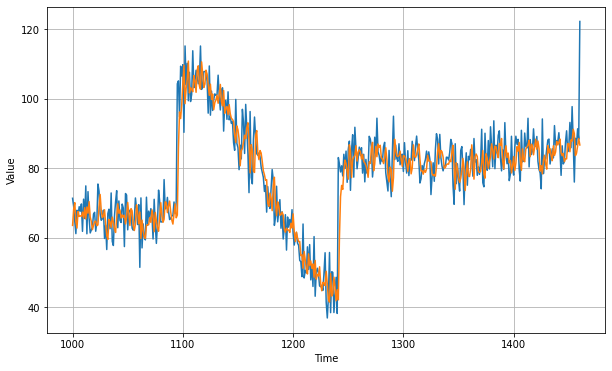

In [0]:
forecast = []

for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))
print(forecast[0:])
forecast = forecast[split_time-window_size:]

results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [0]:
forecast = []

for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))
print(forecast[0:5])

[array([[43.27876]], dtype=float32), array([[50.2413]], dtype=float32), array([[49.8038]], dtype=float32), array([[45.704063]], dtype=float32), array([[44.110233]], dtype=float32)]


In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.0553374